### Download the Dataset

In [15]:
import kagglehub

# Download the latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /home/faramarz/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [16]:
import os
import shutil

# Get current working directory (project directory)
project_dir = os.getcwd()

# Move downloaded files to project directory 
if os.path.exists(path):
    for file in os.listdir(path):
        src = os.path.join(path, file)
        dst = os.path.join(project_dir, file)
        if os.path.isfile(src):
            shutil.copy2(src, dst)
            print(f"Copied {file} to {project_dir}")
else:
    print(f"Source path {path} does not exist")


Copied WA_Fn-UseC_-Telco-Customer-Churn.csv to /home/faramarz/Documents/University/BAU COMPUTER ENG/DataMining/Project/FinalProject


# 🔰 Step 1: Environment Setup and Data Import
### 1.1. Required Libraries Installation & Import

### 1.2. Load Dataset

In [17]:
# Install in your terminal if needed: pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Load data
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

# View first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 🧹 Step 2: Data Cleaning (Sanitization)
### 2.1 Check for Missing Values

In [18]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

TotalCharges may appear as object due to spaces or bad formatting.

### 2.2 Convert TotalCharges to Numeric & Clean

In [32]:
from sklearn.impute import SimpleImputer

# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check again
print(df['TotalCharges'].isnull().sum())
# Handle missing 'TotalCharges' by imputing zero or median
tc_imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = tc_imputer.fit_transform(df[['TotalCharges']])

# Alternative approaches:
# - Drop rows with missing TotalCharges if few (< 1%).
# - Use KNN-imputation for more context-aware filling.
# Drop rows with missing TotalCharges
df = df[df['TotalCharges'].notnull()]
df.reset_index(drop=True, inplace=True)


0


# 📊 Step 3: Exploratory Data Analysis (EDA)
### 3.1 Overview of Dataset

(7032, 31)


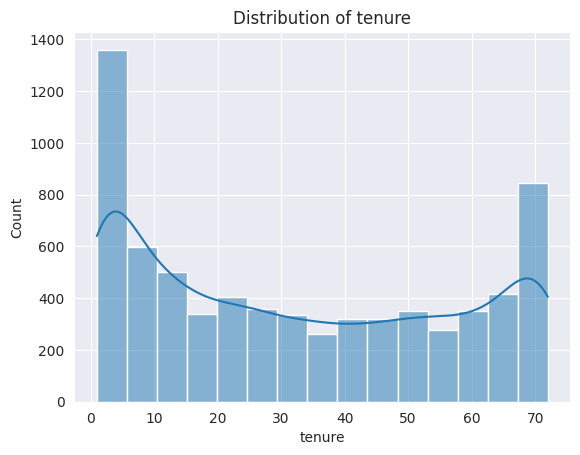

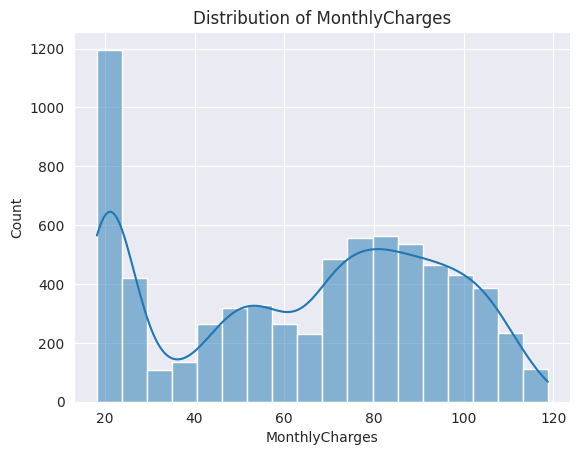

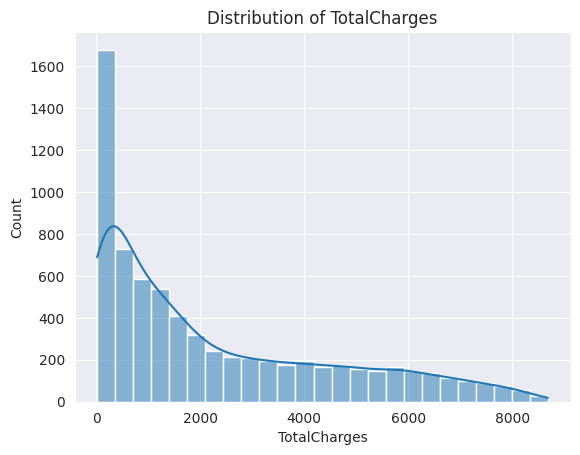

In [33]:
print(df.shape)
df['Churn'].value_counts(normalize=True)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].describe()

# Histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 3.2 Categorical Counts
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != 'customerID']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()



#### 3.2 Visualizing Key Variables

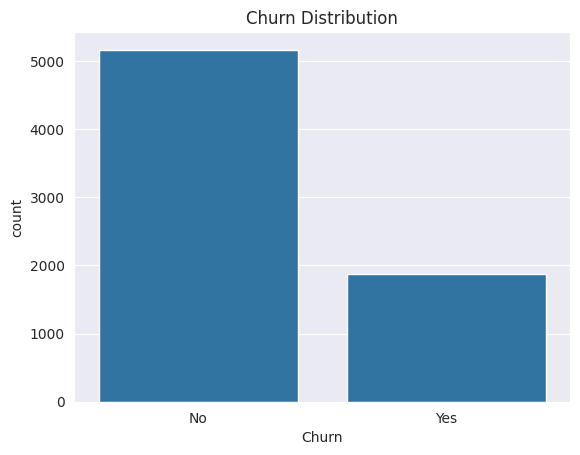

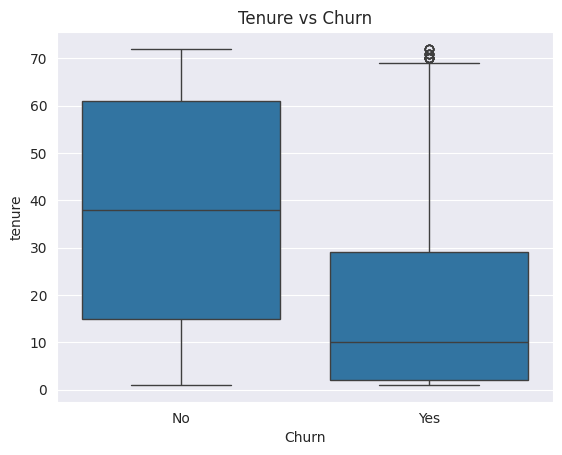

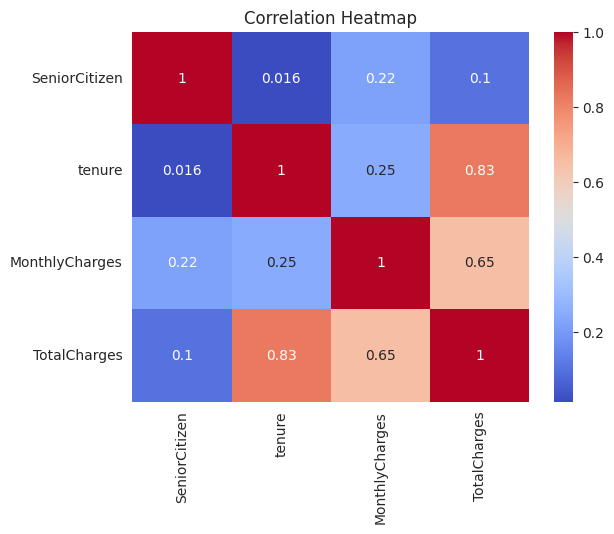

In [22]:
# Plot churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Boxplot: tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

# Correlation heatmap
numerics = df.select_dtypes(include=['int64', 'float64'])
corr = numerics.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# ⚙️ Step 4: Data Preprocessing
### 4.1 Encode Categorical Variables

In [23]:
# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode remaining categoricals
df = pd.get_dummies(df, drop_first=True)


# 🧪 Step 5: Feature Selection

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Select best features
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
print("Number of features selected:", X_new.shape[1])

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top features:\n", selected_features)


Number of features selected: 10
Top features:
 Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


# 🧱 Step 6: Train/Test Split + Scaling

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 🤖 Step 7: Model Training & Evaluation
### 7.1 KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7654028436018957
[[1353  196]
 [ 299  262]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1549
           1       0.57      0.47      0.51       561

    accuracy                           0.77      2110
   macro avg       0.70      0.67      0.68      2110
weighted avg       0.75      0.77      0.76      2110



### 7.2 Decision Tree

In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7080568720379147


### 7.3 Random Forest

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7516587677725118


### 7.4 Gradient Boosting

In [30]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7919431279620853


# 📈 Step 8: Compare Models

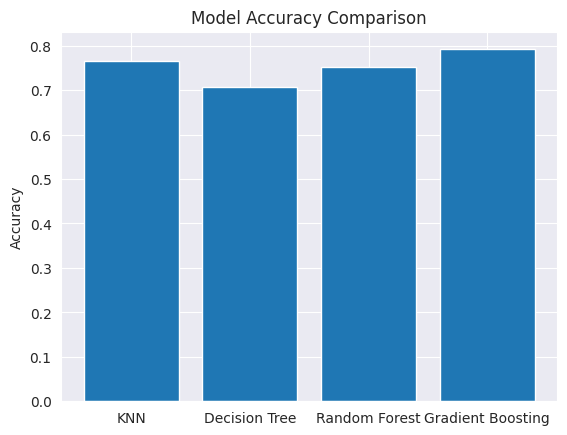

In [31]:
results = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

# Plot model comparison
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
